In [38]:
import sys
sys.path.append('../utils/')
sys.path.append('../paviaUTools/')

import matplotlib.pyplot as plt
from datasetLoader import datasetLoader
import os
import numpy as np
from whole_pipeline import whole_pipeline_all, whole_pipeline_divided, whole_pipeline_divided_parallel
import torch
from plots import *
from weights_anal import *
from consts import *
import gc
torch.cuda.empty_cache()
gc.collect()

%load_ext autoreload
%autoreload 2
%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
parent_dir = os.path.join(os.getcwd(),"..")
# csv_path = os.path.join(parent_dir, 'datasets', 'paviaU.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'paviaU_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'pavia.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'pavia_gt.csv')
csv_path = os.path.join(parent_dir, 'datasets', 'KSC.csv')
gt_path = os.path.join(parent_dir, 'datasets', 'KSC_gt.csv')

dsl = datasetLoader(csv_path, gt_path)

df = dsl.read_dataset(gt=False)
X = np.array(df)
# X = X.reshape((610,340, 103))
# X = X.reshape((1096, 715, 102))
X = X.reshape((512, 614, 176))

df = dsl.read_dataset(gt=True)
y = np.array(df)

factor = 7
rows_factor = factor
cols_factor = factor

X = torch.from_numpy(X)
y = torch.from_numpy(y)

X = X.to(device)
y = y.to(device)

torch.Size([176, 176])
tensor([[74., 74., 74.,  ..., 74., 74., 74.],
        [74., 74., 74.,  ..., 74., 74., 74.],
        [74., 74., 74.,  ..., 74., 74., 74.],
        ...,
        [74., 74., 74.,  ..., 74., 74., 74.],
        [74., 74., 74.,  ..., 74., 74., 74.],
        [74., 74., 74.,  ..., 74., 74., 74.]])


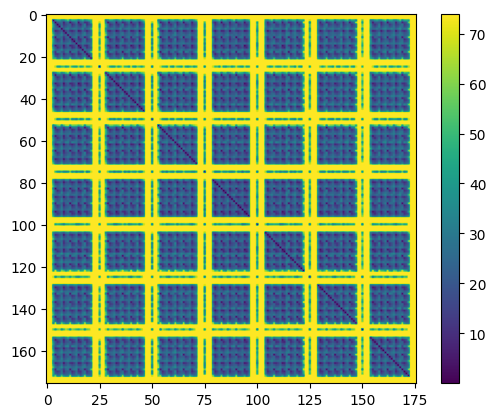

In [44]:
from MetaLearner import HDDOnBands
from consts import *

distances = HDDOnBands.run(X, METRIC_BANDS, factors_for_batch=(7,7))

print(distances.shape)
print(distances)

show_distances(distances)


# weights, dist_batches = HDDOnBands.createL1WeightedBatches(X, normalize=False)

# show_weights(weights, is_normalized=False)


# plot_tree(distances.cpu().numpy())

XXXXXXX IN METHOD XXXXXXXXX
WHOLE METHOD TIME:  0.39867687225341797
XXXXXXX IN CLASSIFICATION XXXXXXXXX
total classified:  35158
total classified:  7617
Train Accuracy:  0.8844359747425906
Test Accuracy:  0.5886832086123146


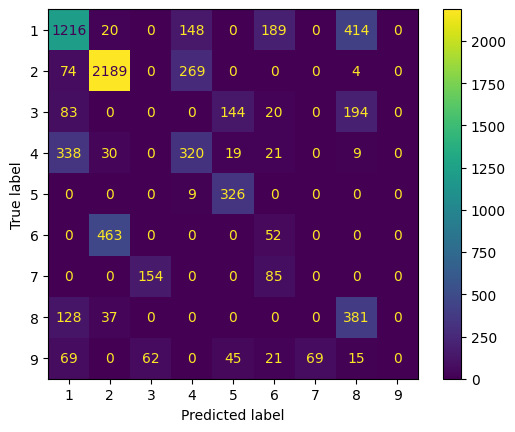

In [14]:
import gc
torch.cuda.empty_cache()
gc.collect()

train_acc,test_acc, test_preds,test_gt = whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common')

confusion_mat(test_gt,test_preds, range(1,10))


TOTAL TIME FOR METHOD:  8.763011932373047
Train Accuracy:  0.8901683677920266
Test Accuracy:  0.5150250417362271


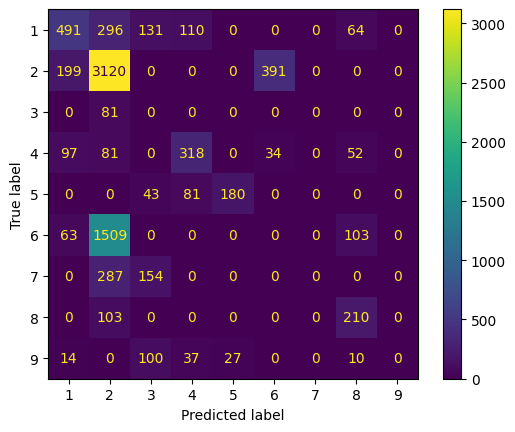

In [15]:
import gc
torch.cuda.empty_cache()
gc.collect()

weights, dist_batches = HDDOnBands.createUniformWeightedBatches(X, clusters_amount=3)

# print(dist_batches[1])

# print(dist_batches)

train_acc,test_acc, test_preds,test_gt = whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches)

confusion_mat(test_gt,test_preds, range(1,10))
